 Data cleaned successfully!

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
None
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-3

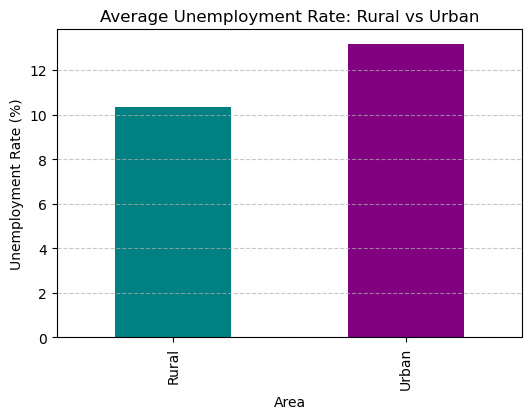


Top 10 Regions with Highest Unemployment:
 Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Name: Estimated Unemployment Rate (%), dtype: float64


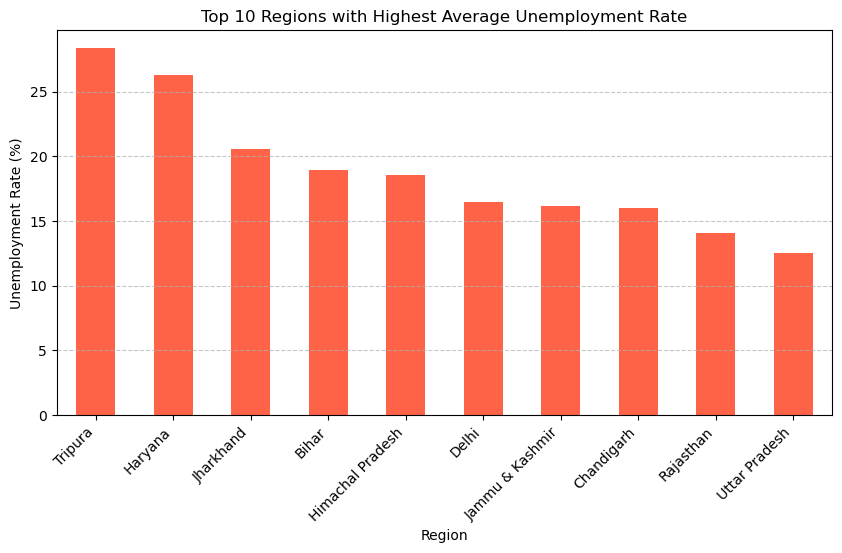

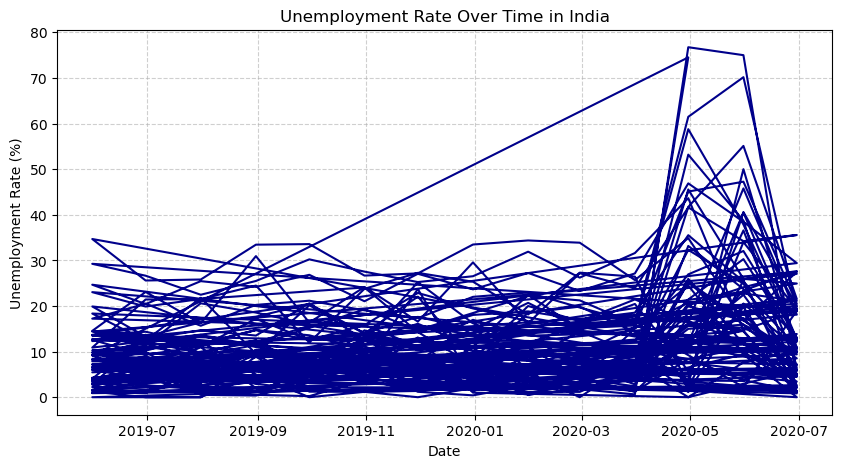

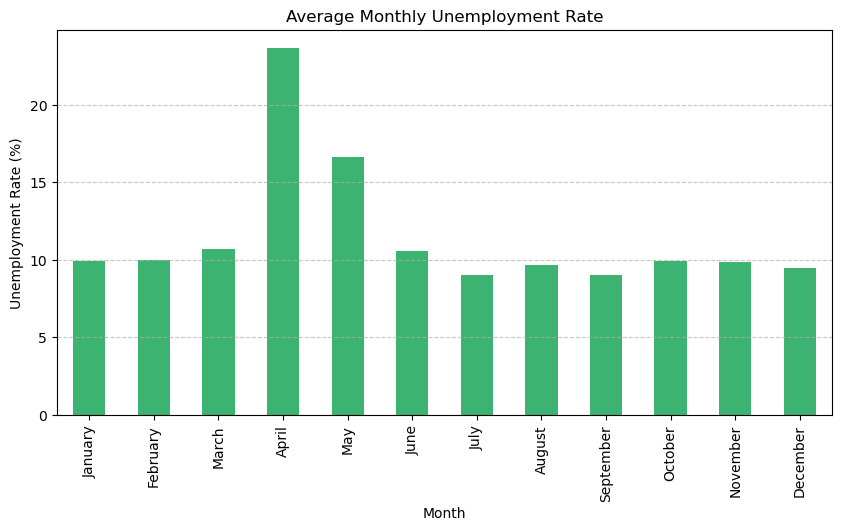


 Average Unemployment Before Covid: 9.51%
Average Unemployment During Covid: 17.77%


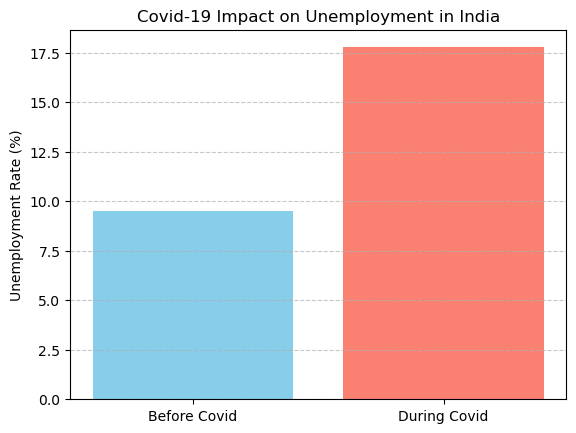


 KEY INSIGHTS:
• Urban areas had higher unemployment (13.17%) than rural areas (10.32%).
• The state/region with the highest average unemployment rate was Tripura (28.35%).
• Average unemployment increased from 9.51% before Covid to 17.77% during Covid.
• Seasonal variation is visible — rates tend to spike around mid-year (lockdown & monsoon periods).
Analysis complete!


In [21]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"E:\jupyter\codealpha_Unemployment Analysis with Python\Unemployment in India.csv")

data.columns = data.columns.str.strip()

for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

data = data.dropna(subset=['Date'])

print(" Data cleaned successfully!\n")
print(data.info())
print(data.head())

print("\n Summary Statistics:")
print(data.describe())

area_unemp = data.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
print("\nAverage Unemployment Rate by Area:\n", area_unemp)

# Plot - Rural vs Urban Comparison
area_unemp.plot(kind='bar', color=['teal', 'purple'], figsize=(6,4))
plt.title('Average Unemployment Rate: Rural vs Urban')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Area')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


top_states = (
    data.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Regions with Highest Unemployment:\n", top_states)

top_states.plot(kind='bar', figsize=(10,5), color='tomato')
plt.title('Top 10 Regions with Highest Average Unemployment Rate')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Estimated Unemployment Rate (%)'], color='darkblue')
plt.title('Unemployment Rate Over Time in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

data['Month'] = data['Date'].dt.month_name()
monthly_avg = data.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

monthly_avg.plot(kind='bar', figsize=(10,5), color='mediumseagreen')
plt.title('Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

pre_covid = data[data['Date'] < '2020-03-01']['Estimated Unemployment Rate (%)'].mean()
during_covid = data[(data['Date'] >= '2020-03-01') & (data['Date'] <= '2021-12-31')]['Estimated Unemployment Rate (%)'].mean()

print(f"\n Average Unemployment Before Covid: {pre_covid:.2f}%")
print(f"Average Unemployment During Covid: {during_covid:.2f}%")

plt.bar(['Before Covid', 'During Covid'], [pre_covid, during_covid], color=['skyblue', 'salmon'])
plt.title('Covid-19 Impact on Unemployment in India')
plt.ylabel('Unemployment Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

highest_area = area_unemp.idxmax()
lowest_area = area_unemp.idxmin()
highest_state = top_states.index[0]
highest_rate = top_states.iloc[0]

print("\n KEY INSIGHTS:")
print(f"• Urban areas had higher unemployment ({area_unemp['Urban']:.2f}%) than rural areas ({area_unemp['Rural']:.2f}%).")
print(f"• The state/region with the highest average unemployment rate was {highest_state} ({highest_rate:.2f}%).")
print(f"• Average unemployment increased from {pre_covid:.2f}% before Covid to {during_covid:.2f}% during Covid.")
print("• Seasonal variation is visible — rates tend to spike around mid-year (lockdown & monsoon periods).")
print("Analysis complete!")
